<a href="https://colab.research.google.com/github/KJM94/pym/blob/main/src/ch02_nlp_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kaggle API

In [1]:
!mkdir ~/.kaggle
!echo '{"username":"kwonjungmin","key":"71b01b2de87cdc8cf37537ed0b9057b2"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!pip install kaggle

In [35]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

KeyboardInterrupt: ignored

In [3]:
!kaggle competitions download -c nlp-getting-started

  0% 0.00/965k [00:00<?, ?B/s]
100% 965k/965k [00:00<00:00, 65.8MB/s]
  0% 0.00/22.2k [00:00<?, ?B/s]
100% 22.2k/22.2k [00:00<00:00, 21.2MB/s]
  0% 0.00/411k [00:00<?, ?B/s]
100% 411k/411k [00:00<00:00, 134MB/s]


In [4]:
import os 
DATA_PATH = "./"
for file in os.listdir(DATA_PATH):
  if 'csv' in file and 'zip' not in file:
    print(file.ljust(30) + str(round(os.path.getsize(file) / 1000000, 2)) + 'MB')

test.csv                      0.42MB
train.csv                     0.99MB
sample_submission.csv         0.02MB


## 데이터 둘러보기

In [5]:
import pandas as pd 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('Data Loading is done!')

Data Loading is done!


### 데이터 셋 확인


In [6]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
train.shape, test.shape

((7613, 5), (3263, 4))

In [8]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None


In [9]:
print(train.head())

   id keyword  ...                                               text target
0   1     NaN  ...  Our Deeds are the Reason of this #earthquake M...      1
1   4     NaN  ...             Forest fire near La Ronge Sask. Canada      1
2   5     NaN  ...  All residents asked to 'shelter in place' are ...      1
3   6     NaN  ...  13,000 people receive #wildfires evacuation or...      1
4   7     NaN  ...  Just got sent this photo from Ruby #Alaska as ...      1

[5 rows x 5 columns]


In [10]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None


In [11]:
print(test.head())

   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan


## EDA

0    4342
1    3271
Name: target, dtype: int64


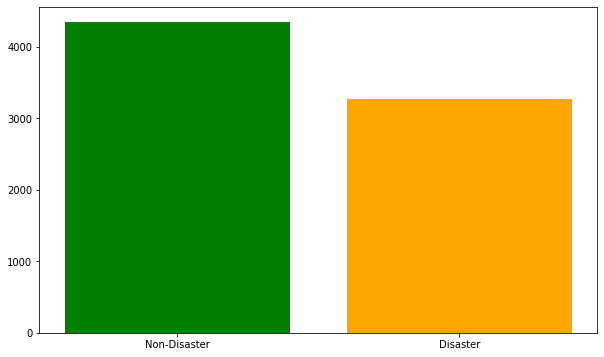

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

print(train['target'].value_counts())
news_class = train['target'].value_counts()
labels = ['Non-Disaster', 'Disaster']

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, news_class, color=['green', 'orange'])

fig.show()

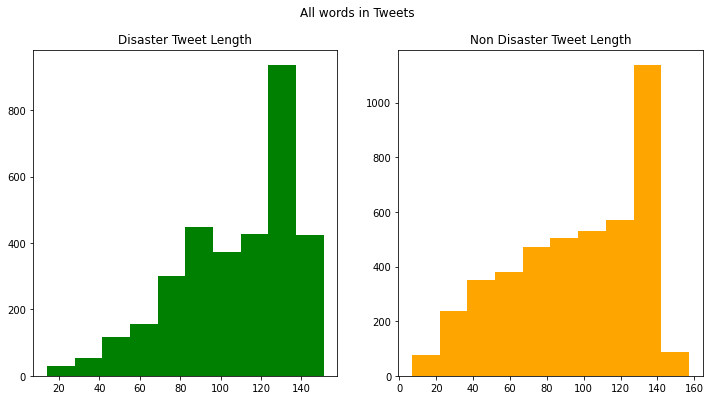

In [13]:
disaster_tweet_len = train[train['target']==1]['text'].str.len()
non_disaster_tweet_len = train[train['target']==0]['text'].str.len()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(disaster_tweet_len, color='green')
ax[0].set_title("Disaster Tweet Length")

ax[1].hist(non_disaster_tweet_len, color='orange')
ax[1].set_title("Non Disaster Tweet Length")

fig.suptitle('All words in Tweets')
plt.show()

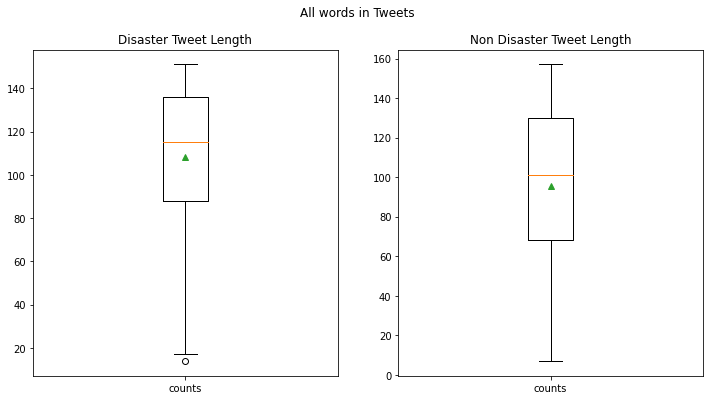

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].boxplot(disaster_tweet_len, labels=['counts'], showmeans=True)
ax[0].set_title("Disaster Tweet Length")

ax[1].boxplot(non_disaster_tweet_len, labels=['counts'], showmeans=True)
ax[1].set_title("Non Disaster Tweet Length")

fig.suptitle('All words in Tweets')
plt.show()

In [15]:
import numpy as np
disaster_tweet_len = train[train['target']==1]['text'].str.len()
non_disaster_tweet_len = train[train['target']==0]['text'].str.len()

print("Max Length of Disaster Tweet: {}".format(np.max(disaster_tweet_len)))
print("Min Length of Disaster Tweet: {}".format(np.min(disaster_tweet_len)))
print("Mean Length of Disaster Tweet: {:.2f}".format(np.mean(disaster_tweet_len)))
print("Median Length of Disaster Tweet: {}".format(np.median(disaster_tweet_len)))

print("Max Length of Non Disaster Tweet: {}".format(np.max(non_disaster_tweet_len)))
print("Min Length of Non Disaster Tweet: {}".format(np.min(non_disaster_tweet_len)))
print("Mean Length of Non Disaster Tweet: {:.2f}".format(np.mean(non_disaster_tweet_len)))
print("Median Length of Non Disaster Tweet: {}".format(np.median(non_disaster_tweet_len)))

Max Length of Disaster Tweet: 151
Min Length of Disaster Tweet: 14
Mean Length of Disaster Tweet: 108.11
Median Length of Disaster Tweet: 115.0
Max Length of Non Disaster Tweet: 157
Min Length of Non Disaster Tweet: 7
Mean Length of Non Disaster Tweet: 95.71
Median Length of Non Disaster Tweet: 101.0


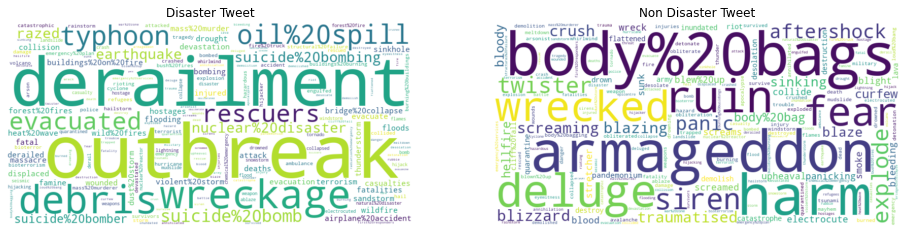

In [16]:
from wordcloud import WordCloud, STOPWORDS

disaster_tweet_keywords = dict(train[train['target']==1]['keyword'].value_counts())
non_disaster_tweet_keywords = dict(train[train['target']==0]['keyword'].value_counts())

stopwords = set(STOPWORDS)
disaster_wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color="white").\
generate_from_frequencies(disaster_tweet_keywords)
non_disaster_wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color="white").\
generate_from_frequencies(non_disaster_tweet_keywords)


fig, ax = plt.subplots(1, 2, figsize=(16, 10))
ax[0].imshow(disaster_wordcloud, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title("Disaster Tweet")
ax[1].imshow(non_disaster_wordcloud, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title("Non Disaster Tweet")
fig.show()

## Feature Engineering

### 결측치 확인
- 다행히 텍스트에는 결측치가 없음

In [17]:
import pandas as pd
def check_na(data):
  isnull_na = (data.isnull().sum() / len(data)) * 100
  data_na = isnull_na.drop(isnull_na[isnull_na == 0].index).sort_values(ascending=False)
  missing_data = pd.DataFrame({'Missing Ratio': data_na, 
                               'Data Type': data.dtypes[data_na.index]})
  print("결측치 데이터 컬럼과 건수:\n", missing_data)

check_na(train)
check_na(test)

결측치 데이터 컬럼과 건수:
           Missing Ratio Data Type
location      33.272035    object
keyword        0.801261    object
결측치 데이터 컬럼과 건수:
           Missing Ratio Data Type
location      33.864542    object
keyword        0.796813    object


### 변수 삭제

In [18]:
test_id = test['id']

for datas in [train, test]:
  datas = datas.drop(['id', 'keyword', 'location'], axis=1, inplace=True)

train.shape, test.shape

((7613, 2), (3263, 1))

### Text Cleansing
- HTML 태그 제거
- 특수문자 공백으로 바꾸기
- 대문자 소문자로 바꾼 후, 리스트로 만들기
- 불용어 제거하기

#### remove_url


In [19]:
import re

def remove_url(text):
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'', text)

sample_text = "새로운 캐글 대회가 열렸습니다. 주소: https://www.kaggle.com/c/nlp-getting-started"
remove_url(sample_text)

'새로운 캐글 대회가 열렸습니다. 주소: '

#### remove_html

In [20]:
def remove_html(text):
  html = re.compile(r'<.*?>')
  return html.sub(r'', text)

sample_text ="""<div>
<h1> Real News or Fake News </h1>
<p> Kaggle Machine Learning </p>
</div>"""

print(remove_html(sample_text))


 Real News or Fake News 
 Kaggle Machine Learning 



#### remove_emoji

In [21]:
!pip install emoji --upgrade

     |████████████████████████████████| 133kB 15.9MB/s 


In [22]:
import emoji
print(emoji.emojize('Phd is very easy!!! :thumbs_up:'))

Phd is very easy!!! 👍


In [23]:
def remove_emoji(text):
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', text)

remove_emoji("Hello, 👍")

'Hello, '

#### Remove Special Letters

In [24]:
def remove_punct(text):
  return re.sub("[^a-zA-Z]", " ", text)

sample_text = "Hello!, Can I have one question?.., Is it #Outbreak?"
remove_punct(sample_text)

'Hello   Can I have one question     Is it  Outbreak '

In [25]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

print("Total Length of stopwords:", len(stopwords.words('english')))
print(stopwords.words('english')[:10])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Total Length of stopwords: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [26]:
import string
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def data_cleansing(text, remove_stopwords = False):
  # remove url 
  url = re.compile(r'https?://\S+|www\.\S+')
  cleaned_text = url.sub(r'', text)

  # remove html
  html = re.compile(r'<.*?>')
  cleaned_text = html.sub(r'', cleaned_text)

  # remove emoji
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  cleaned_text = emoji_pattern.sub(r'', cleaned_text)

  # Special Letters to empty space
  cleaned_text = re.sub("[^a-zA-Z]", " ", cleaned_text)

  # Lowercase
  cleaned_text = cleaned_text.lower().split()

  if remove_stopwords:
    stops = set(stopwords.words("english"))
    cleaned_text = [word for word in cleaned_text if not word in stops]
    clean_review = ' '.join(cleaned_text)
  else:
    clean_review = ' '.join(cleaned_text)

  return clean_review

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
clean_train_reviews = []
for datas in [train, test]:
    datas['cleaned_text'] = datas['text'].apply(lambda x : data_cleansing(x, remove_stopwords=True))

train.head(5)

,text,target,cleaned_text
0,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders cal...
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...


In [28]:
test.head(5)

,text,cleaned_text
0,Just happened a terrible car crash,happened terrible car crash
1,"Heard about #earthquake is different cities, s...",heard earthquake different cities stay safe ev...
2,"there is a forest fire at spot pond, geese are...",forest fire spot pond geese fleeing across str...
3,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills china taiwan


### Text Transformation Vectorizer

#### CountVectorizer

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['As you know, I want to be with you']
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) 
print(vector.vocabulary_)

[[1 1 1 1 1 1 2]]
{'as': 0, 'you': 6, 'know': 2, 'want': 4, 'to': 3, 'be': 1, 'with': 5}


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['As you know, I want to be with you', 
          'Thank you, but I cannot be with you']
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) 
print(vector.vocabulary_)

[[1 1 0 0 1 0 1 1 1 2]
 [0 1 1 1 0 1 0 0 1 2]]
{'as': 0, 'you': 9, 'know': 4, 'want': 7, 'to': 6, 'be': 1, 'with': 8, 'thank': 5, 'but': 2, 'cannot': 3}


#### TfidfVectorizer

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = ['Can I have lunch with you?', 
          'No, I cannot have it with you.', 
          'Because, I need to study later']
tfidfv = TfidfVectorizer().fit(corpus)
print(np.round(tfidfv.transform(corpus).toarray(), 2))
print(tfidfv.vocabulary_)

[[0.   0.52 0.   0.39 0.   0.   0.52 0.   0.   0.   0.   0.39 0.39]
 [0.   0.   0.46 0.35 0.46 0.   0.   0.   0.46 0.   0.   0.35 0.35]
 [0.45 0.   0.   0.   0.   0.45 0.   0.45 0.   0.45 0.45 0.   0.  ]]
{'can': 1, 'have': 3, 'lunch': 6, 'with': 11, 'you': 12, 'no': 8, 'cannot': 2, 'it': 4, 'because': 0, 'need': 7, 'to': 10, 'study': 9, 'later': 5}


## Modeling

### Data Split

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 0.0, analyzer='char', sublinear_tf=True, ngram_range=(1, 3), max_features = 10000)
X = vectorizer.fit_transform(train['cleaned_text']).todense()
y = train['target'].values

In [34]:
print(X.shape)
print(y.shape)

(7613, 9444)
(7613,)


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((5329, 9444), (2284, 9444), (5329,), (2284,))

### Modeling

In [36]:
from sklearn.linear_model import LogisticRegression
lgs = LogisticRegression(class_weight = 'balanced')
lgs.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Test

In [66]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

X_testset = vectorizer.transform(test['cleaned_text']).todense()
print("The Shape of Test Dataset:", X_testset.shape)

y_test_pred = lgs.predict(X_testset)
print("The Predict Value:", y_test_pred)
y_test_pred = np.where(y_test_pred >= 0.5, 1, 0)
print("The Predict Class:", y_test_pred)

submission_file = pd.DataFrame({'id': test_id, 'target': y_test_pred})
print(submission_file.head())

submission_file.to_csv('submission_lgs_20210210.csv', index = False)

The Shape of Test Dataset: (3263, 9444)
The Predict Value: [1 0 1 ... 1 1 1]
The Predict Class: [1 0 1 ... 1 1 1]
   id  target
0   0       1
1   2       0
2   3       1
3   9       1
4  11       1


#### Validation

In [67]:
y_pred_lgs = lgs.predict(X_valid)

In [68]:
confusion_matrix(y_valid, y_pred_lgs)

array([[1090,  248],
       [ 233,  713]])

In [40]:
print("Accuracy: {}".format(accuracy_score(y_valid, y_pred_lgs)))

Accuracy: 0.7894045534150613


In [41]:
f1_score(y_valid, y_pred_lgs)

0.7477713686418458

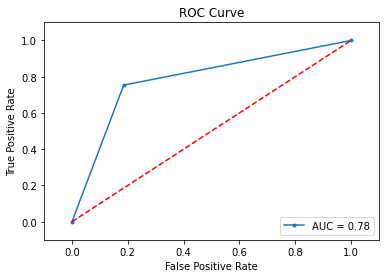

In [42]:
fpr, tpr, _ = roc_curve(y_valid, y_pred_lgs)
auc_score = auc(fpr, tpr)

# clear current figure
plt.clf()

plt.title('ROC Curve')
plt.plot(fpr, tpr, marker='.', label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

### Submit

In [43]:
X_testset = vectorizer.transform(test['cleaned_text']).todense()

In [44]:
print(X_testset.shape)

(3263, 9444)


In [45]:
y_test_pred = lgs.predict(X_testset)

In [46]:
import numpy as np
y_test_pred = np.where(y_test_pred >= 0.5, 1, 0)
y_test_pred

array([1, 0, 1, ..., 1, 1, 1])

In [47]:
submission_file = pd.DataFrame({'id': test_id, 'target': y_test_pred})
submission_file

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,0
3259,10865,1
3260,10868,1
3261,10874,1


In [69]:
submission_file.to_csv('submission_lgs_20210210.csv', index = False)

### Evaluation

#### Accuracy (정확도)
- URL: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [49]:
def accuracy(y_true, y_pred):
  correct_counter = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == yp:
      correct_counter +=1
  return correct_counter / len(y_true)

In [50]:
from sklearn import metrics
y_true = [0, 1, 1, 1, 0, 0, 0, 1, 0]
y_pred = [0, 0, 1, 0, 0, 0, 0, 1, 1]

print(round(metrics.accuracy_score(y_true, y_pred), 2))
print(round(accuracy(y_true, y_pred), 2))

0.67
0.67


#### Confusion Metrics (혼동행렬)

![](https://blog.kakaocdn.net/dn/bYy2ck/btqyuEJMtta/3qkcbPk3rQiic6J7mHVWQ0/img.png)

- True Positive (TP): 모형은 암이다 예측, 실제로도 암이었음
- True Negative (TN): 모형은 암이 아니다 예측, 실제로도 암이 아니었음 
- False Positive (FP): 모형은 암이다 예측, 실제로는 아니었음
- False Negative (FN): 모형은 암이 아니다 예측, 실제로는 암이었음

In [51]:
def true_positive(y_true, y_pred):
  tp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 1 and yp == 1:
      tp += 1
  return tp

def true_negative(y_true, y_pred):
  tn = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 0 and yp == 0:
      tn += 1
  return tn 

def false_positive(y_true, y_pred):
  fp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 0 and yp == 1:
      fp += 1
  return fp

def false_negative(y_true, y_pred):
  fn = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 1 and yp == 0:
      fn += 1
  return fn 

In [52]:
y_true = [0, 1, 1, 1, 0, 0, 0, 1, 0, 1]
y_pred = [0, 0, 1, 0, 0, 0, 0, 1, 1, 0]

print("True Negative {}".format(true_negative(y_true, y_pred)))
print("False Positive {}".format(false_positive(y_true, y_pred)))
print("False Negative {}".format(false_negative(y_true, y_pred)))
print("True Positive {}".format(true_positive(y_true, y_pred)))

True Negative 4
False Positive 1
False Negative 3
True Positive 2


In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[4, 1],
       [3, 2]])

In [54]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

(4, 1, 3, 2)

In [55]:
def accuracy_v2(y_true, y_pred):
  tp = true_positive(y_true, y_pred)
  tn = true_negative(y_true, y_pred)
  fp = false_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)

  accuracy_score = (tp + tn) / (tp + tn + fp + fn)
  return accuracy_score

print(round(accuracy_v2(y_true, y_pred), 2))

0.6


#### Precision (정밀도)
- 총 100개의 이미지
- 90개는 정상 이미지 / 10개는 암진단 이미지
  + 정상 이미지 중 80개는 정상으로 예측, 10개는 암으로 예측 (오류)
  + 암 진단 이미지 중 8개는 암으로 예측, 2개는 정상으로 예측 (오류)
- 계산하면, 다음과 같다. 
  + TP: 8개
  + TN: 80개
  + FP: 10개
  + FN: 2개

![](https://blog.kakaocdn.net/dn/bYy2ck/btqyuEJMtta/3qkcbPk3rQiic6J7mHVWQ0/img.png)

- Precision = TP / (TP + FP)
  + 모형이 양성이라고 예측한 것 중에서, 실제로 양성인 것
  + 양성으로 예측한 것 중에서 실제로 양성으로 예측한 비율은 8 / (8 + 10) = 0.444
  + Precision을 올리기 위해서는 TP를 올리거나 FP를 내려야 함
  + 예측 성능의 모델의 입장에서 보는 것



In [56]:
from sklearn.metrics import precision_score

def precision(y_true, y_pred):
  tp = true_positive(y_true, y_pred)
  fp = false_positive(y_true, y_pred)

  precision = tp / (tp + fp)
  return precision

print("user function:", precision(y_true, y_pred))
print("scikit-learn function:", precision_score(y_true, y_pred))

user function: 0.6666666666666666
scikit-learn function: 0.6666666666666666


#### Recall (재현율) 
- 실제 양성 중에서, 모델이 양성이라고 예측한 것
- Recall = TP / (TP + FN) = 8 / (8 + 2)


In [57]:
from sklearn.metrics import recall_score

def recall(y_true, y_pred):
  tp = true_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)

  recall = tp / (tp + fn)
  return recall 

print("user function:", recall(y_true, y_pred))
print("scikit-learn function:", recall_score(y_true, y_pred))

user function: 0.4
scikit-learn function: 0.4


> 좋은 모델은 정밀도와 재현율이 모두 높아야 한다. 

#### Threshold
- 분류는 보통 확률값으로 우선 먼저 떨어지고, 그 다음에 임계값을 정한다. 
- Default는 보통 0.5이다. 


In [58]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0.02638412, 0.11114267, 0.31620708, 
          0.0490937, 0.0191491, 0.17554844, 
          0.15952202, 0.03819563, 0.11639273, 
          0.079377, 0.08584789, 0.39095342, 
          0.27259048, 0.03447096, 0.04644807, 
          0.03543574, 0.18521942, 0.05934905, 
          0.61977213, 0.33056815]

len(y_true), len(y_pred)

(20, 20)

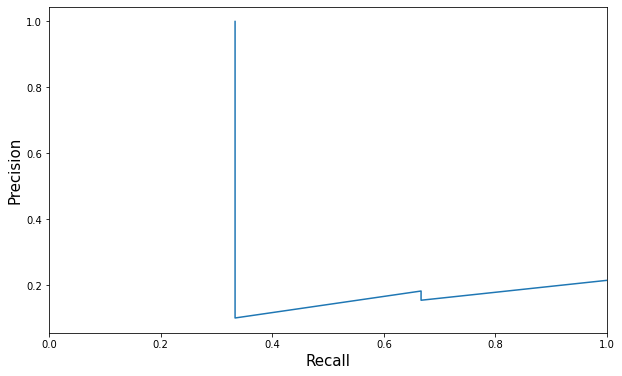

In [59]:
import matplotlib.pyplot as plt

precisions = []
recalls = []

thresholds =  [0.0490937 , 0.05934905, 0.079377, 
               0.08584789, 0.11114267, 0.11639273, 
               0.15952202, 0.17554844, 0.18521942, 
               0.27259048, 0.31620708, 0.33056815, 
               0.39095342, 0.61977213]

for i in thresholds:
  temp_prediction = [1 if x >= i else 0 for x in y_pred]
  p = precision(y_true, temp_prediction)
  r = recall(y_true, temp_prediction)

  precisions.append(p)
  recalls.append(r)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(recalls, precisions)
ax.set_xlabel('Recall', fontsize=15)
ax.set_ylabel('Precision', fontsize=15)
ax.set_xlim(0, 1.0)
fig.show()

> 임계값을 어떻게 설정하느냐에 따라 정밀도와 재현율의 값이 달라진다. 
- https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall


#### F1 Score
- Precision & Recall의 가중 평균(Weighted Average)
- P: Precision (정밀도)
- R: Recall (재현율)
- 공식은 다음과 같다. 
  + F1 = 2PR / (P + R)
  + F1 = 2TP / (2TP + FP + FN)


In [60]:
def f1(y_true, y_pred):
  p = precision(y_true, y_pred)
  r = recall(y_true, y_pred)
  score = 2 * p * r / (p + r)
  return score

In [61]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

f1(y_true, y_pred)

0.5714285714285715

In [62]:
from sklearn import metrics
print(metrics.f1_score(y_true, y_pred))

0.5714285714285715


- 종속변수의 라벨이 주로 불균형을 이룰 때에는 Accuracy 보다는 F1 스코어를 주요 평가 지표로 삼는다. 
- F1 스코어가 1에 가까울수록 좋은 모델이라고 평가한다. 

#### AUC
- TPR = Recall
- FPR = False Positive Rate = FP / (TN + FP)


In [63]:
def tpr(y_true, y_pred):
  return recall(y_true, y_pred)

def fpr(y_true, y_pred):
  fp = false_positive(y_true, y_pred)
  tn = true_negative(y_true, y_pred)
  return fp / (tn + fp)

- why? fp / (tn + fp) if (tn + fp) else 0
  + [Make division by zero equal to zero](https://stackoverflow.com/questions/27317517/make-division-by-zero-equal-to-zero)

    threshold  fpr  tpr
0        0.00  1.0  1.0
1        0.10  0.9  1.0
2        0.20  0.7  1.0
3        0.30  0.6  0.8
4        0.40  0.3  0.8
5        0.50  0.3  0.8
6        0.60  0.2  0.8
7        0.70  0.1  0.6
8        0.80  0.1  0.6
9        0.85  0.1  0.4
10       0.90  0.0  0.4
11       0.99  0.0  0.2
12       1.00  0.0  0.0


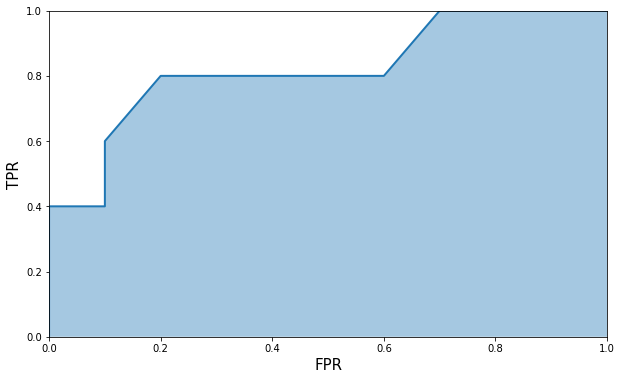

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

tpr_list = []
fpr_list = []

y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]


for thresh in thresholds:
  temp_pred = [1 if x >= thresh else 0 for x in y_pred]
  temp_tpr = tpr(y_true, temp_pred) 
  temp_fpr = fpr(y_true, temp_pred)
  temp_fpr = round(temp_fpr, 1)
  tpr_list.append(temp_tpr)
  fpr_list.append(temp_fpr)

print(pd.DataFrame({"threshold": thresholds, "fpr": fpr_list, "tpr": tpr_list}))

fig, ax = plt.subplots(figsize=(10, 6))
ax.fill_between(fpr_list, tpr_list, alpha=0.4)
ax.plot(fpr_list, tpr_list, lw=2)
ax.set_xlim(0, 1.0)
ax.set_ylim(0, 1.0)
ax.set_xlabel("FPR", fontsize=15)
ax.set_ylabel("TPR", fontsize=15)
plt.show()

In [65]:
from sklearn import metrics

y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]

metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

- AUC에 관한 결과 해석
  + AUC = 1.0: 가장 좋은 모델
  + AUC = 0.5: 직관적으로, 인간이 직접 분류하는 것과 차이가 없거나 더 못한 경우
  + AUC = 0.0: 데이터 전처리 및 학습에 문제가 생긴 것